In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import os
import json
import datetime

plt.rcParams["figure.figsize"] = (20, 5)

In [2]:
data = pd.read_csv("../로그 데이터/stream_14gb_2vm_gpa_pf_stride.csv").drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1)
data

Category  gpa_counter          gpa         rip   vmid      gpanext  \
0              0     14182421   4228210748 -1072224345   2921  24137111463   
1              1      2072403  24137111463 -1072224345   2921   4228210750   
2              0     14182422   4228210750 -1072223548   2921  24137112260   
3              1      2072404  24137112260 -1072223548   2921   4228210905   
4              0     14182423   4228210905 -1072221726   2921  24137114082   
...          ...          ...          ...         ...    ...          ...   
130216         1      2193458   7135759486 -1884091266  11178  16377692532   
130217         1      2193459  16377692532 -1884091266  11178   7135759486   
130218         1      2193460   7135759486 -1884091266  11178  16377692536   
130219         1      2193461  16377692536 -1884091266  11178   7135759486   
130220         1      2193462   7135759486 -1884091266  11178   7135759153   

         gpa_stride     ripnext  rip_stride  
0      -19908900715 -1072224345           0  
1       19908900713 -1072223548        -797  
2      -19908901510 -1072223548           0  
3       19908901355 -1072221726       -1822  
4      -19908903177 -1072221726           0  
...             ...         ...         ...  
130216  -9241933046 -1884091266           0  
130217   9241933046 -1884091266           0  
130218  -9241933050 -1884091266           0  
130219   9241933050 -1884091266           0  
130220          333 -1884091599         333  

[130221 rows x 9 columns]

In [3]:
delta = data["gpa_stride"].copy().to_numpy()
delta

array([-19908900715,  19908900713, -19908901510, ...,  -9241933050,
         9241933050,          333], dtype=int64)

In [4]:
data_counts = data["gpa_stride"].value_counts()
data_counts

 333            11148
-9241933042      5609
-9241933050      5609
-9241933046      5608
 9241933050      5607
                ...  
-5718469425         1
 5719333681         1
 2255465265         1
 22350091471        1
 2475199281         1
Name: gpa_stride, Length: 3081, dtype: int64

In [5]:
def category_by_threshold(data_counts, threshold, sign="over"):
    if sign == "under":
        category = (data_counts < threshold)
    else:
        category = (data_counts > threshold)
    return category.index[category == True]

In [6]:
def tokenizer(data, category, oov=-1):
    data = data.copy()
    mask = np.isin(data, category)
    data[mask == False] = oov
    return data

In [7]:
threshold = 100
category_over_threshold = category_by_threshold(data_counts, threshold)
category_over_threshold

Int64Index([         333,  -9241933042,  -9241933050,  -9241933046,
              9241933050,   9241933046,   9241933042, -22227891446,
            -22227891450, -22227891442,  22227891446,  22227891442,
             22227891450,  -4783604045,   4783603379, -19908900233,
             19908900169,  19908900233, -19908900171, -19908900282,
            -12282992058, -12282991947,  12282992009, -12282992009,
             12282991945,  19908900284,  -7662200015,   7662200015,
             12282992060, -22289204431,  22289204431, -19908903177,
             19908903334, -12283126025,   8006640847,  -8006640847,
             12283126182, -19908901510, -19908902660, -19908902652,
             19908902652, -19908900704, -19908900715,  19908900704,
             19908900713, -12282993286, -12282994436, -12282992480,
            -12282994428,  12282992480,  12282994428, -12282992491,
             12282992489,  -7663719631,   7663719631,  21819815119,
            -21819815119,  -9246549199,   924654

In [8]:
tokenized_data = tokenizer(delta, category_over_threshold.to_numpy(), oov=-1)
tokenized_data

array([-19908900715,  19908900713, -19908901510, ...,  -9241933050,
         9241933050,          333], dtype=int64)

In [9]:
tokenized_data_counts = pd.Series(data=tokenized_data.T).value_counts()
tokenized_data_counts

-1              14534
 333            11148
-9241933042      5609
-9241933050      5609
-9241933046      5608
                ...  
-2475420465       110
 19908902503      109
 12895749327      109
-12895749327      109
 19908902660      104
Length: 100, dtype: int64

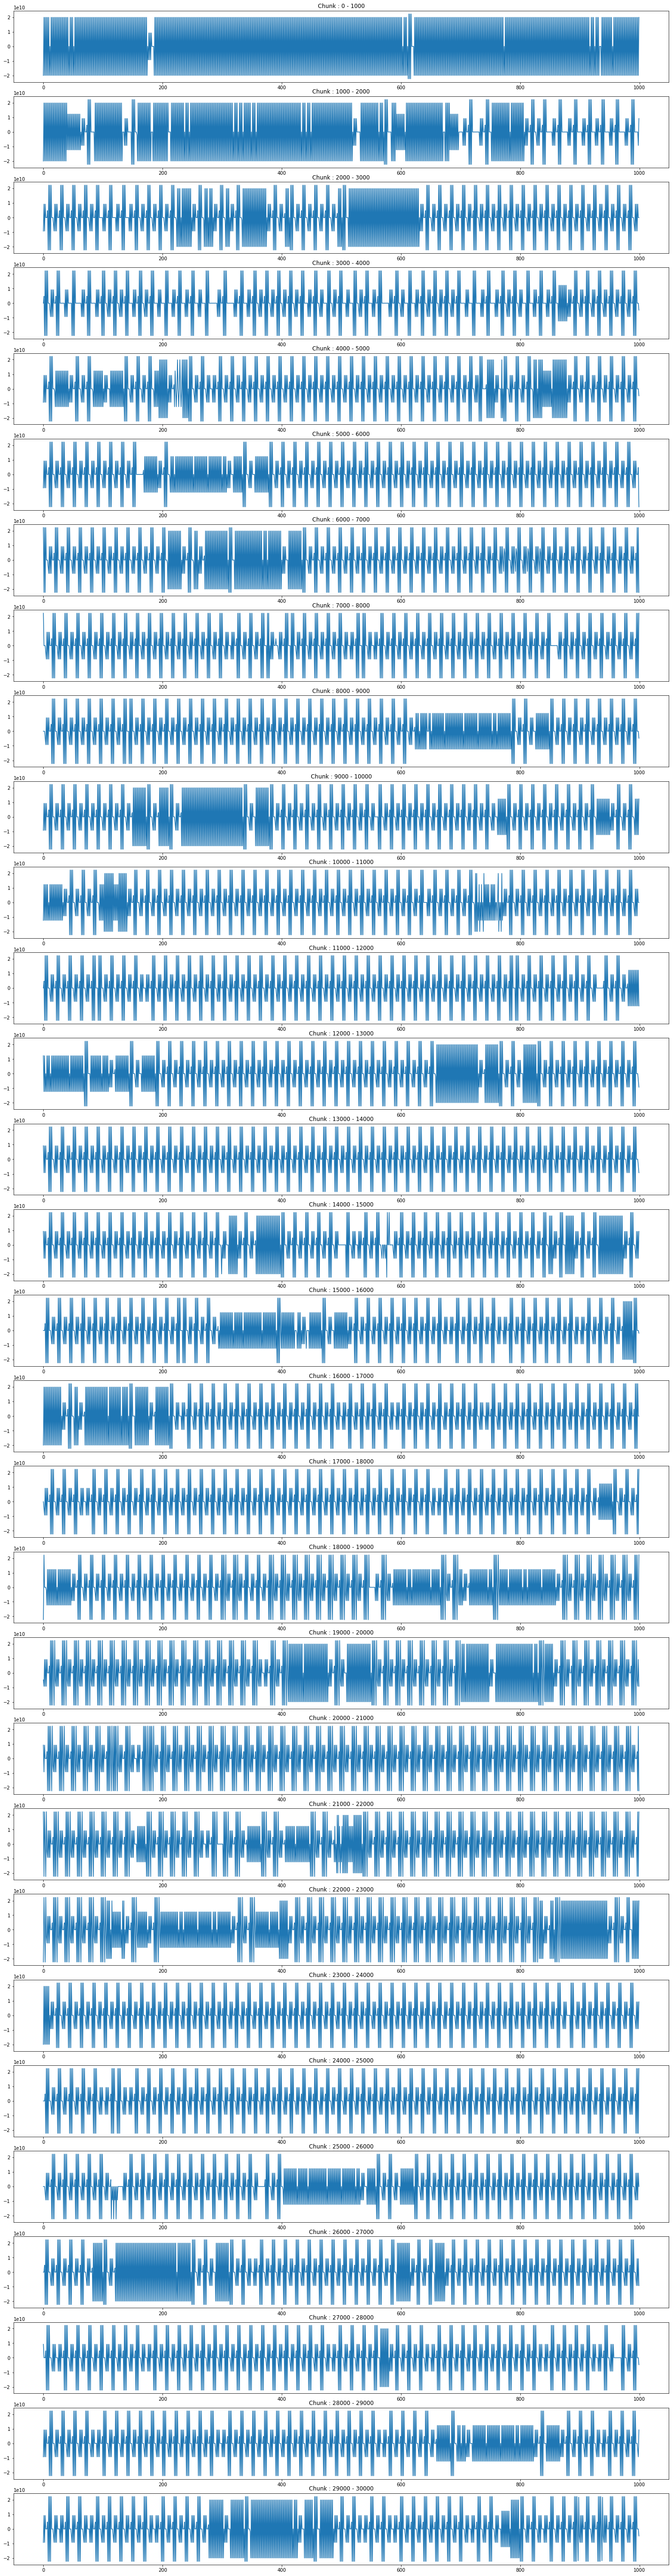

In [12]:
plt.figure(figsize=(25, 100))
num_chunk = 30
for i in range(num_chunk):
        ax = plt.subplot(num_chunk, 1, i+1)
        title = plt.title("Chunk : {} - {}".format(i*1000, (i+1)*1000))
        plot = plt.plot(tokenized_data[i*1000:(i+1)*1000])

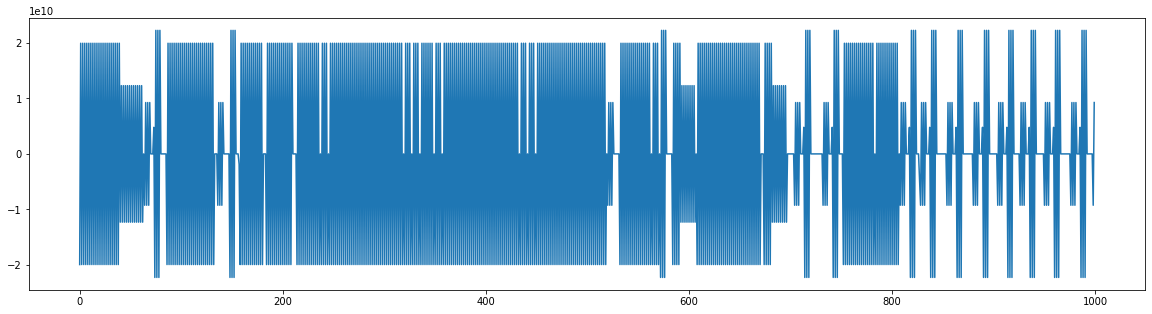

In [18]:
plt.plot(tokenized_data[1000:2000])

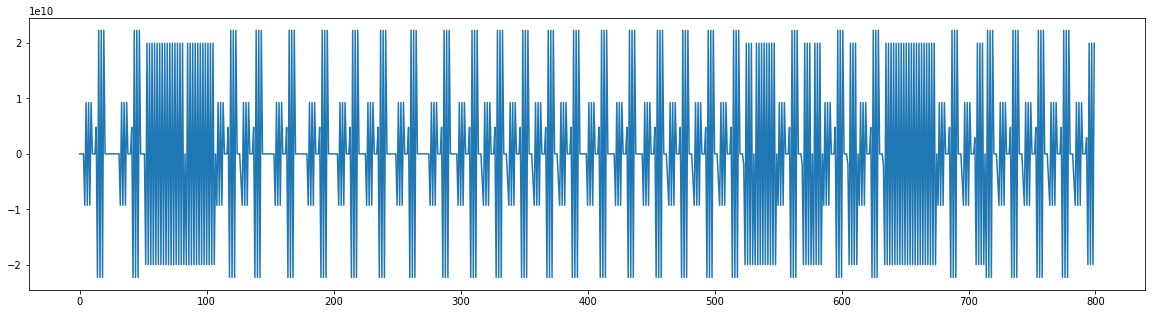

In [19]:
plt.plot(tokenized_data[1700:2500])

In [20]:
initial_stage_index = 1700

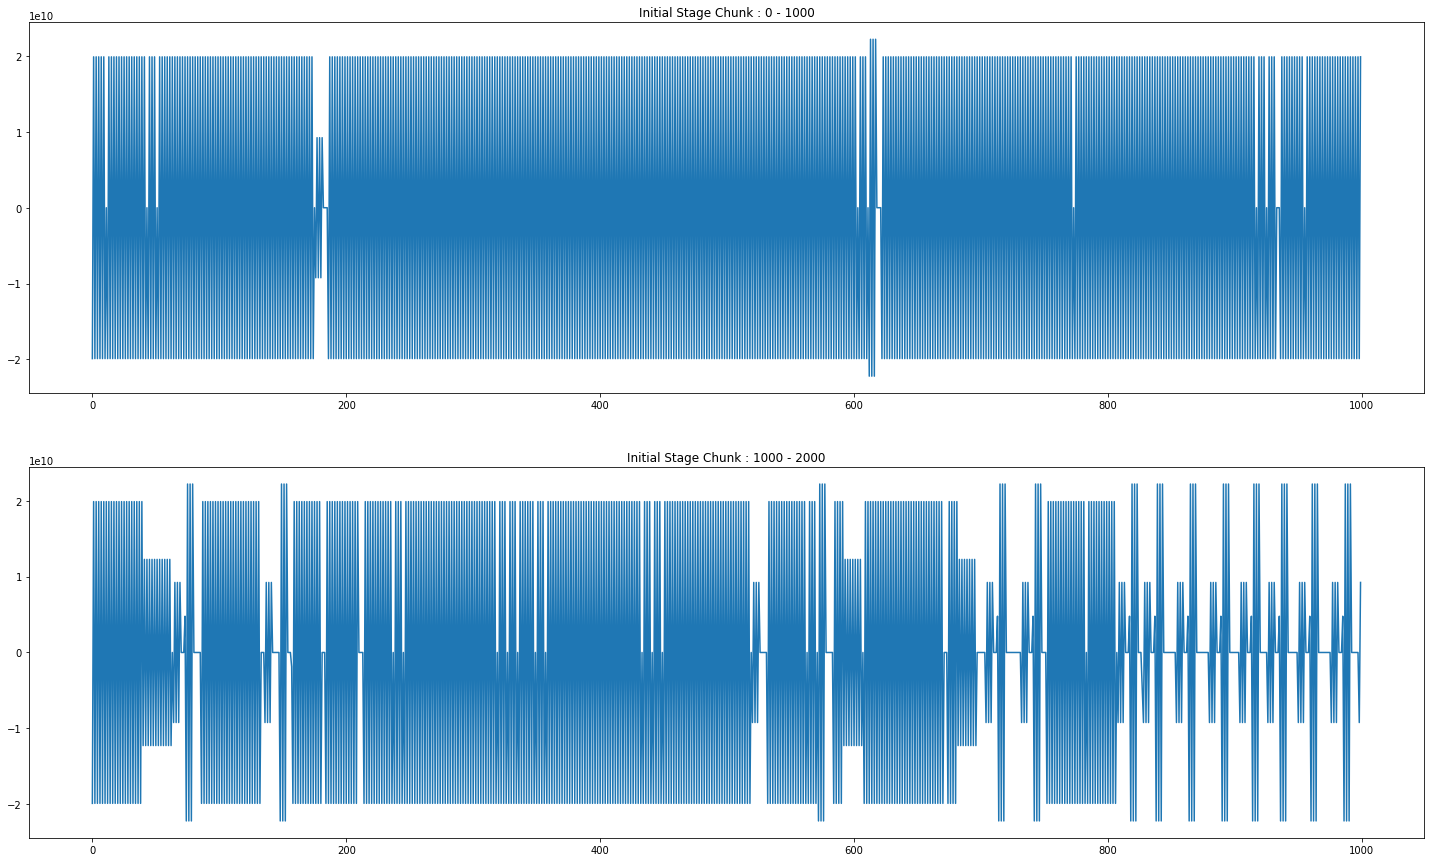

In [21]:
plt.figure(figsize=(25, 15))
num_chunk = initial_stage_index//1000 + 1
for i in range(num_chunk):
        ax = plt.subplot(num_chunk, 1, i+1)
        title = plt.title("Initial Stage Chunk : {} - {}".format(i*1000, (i+1)*1000))
        plot = plt.plot(tokenized_data[i*1000:(i+1)*1000])

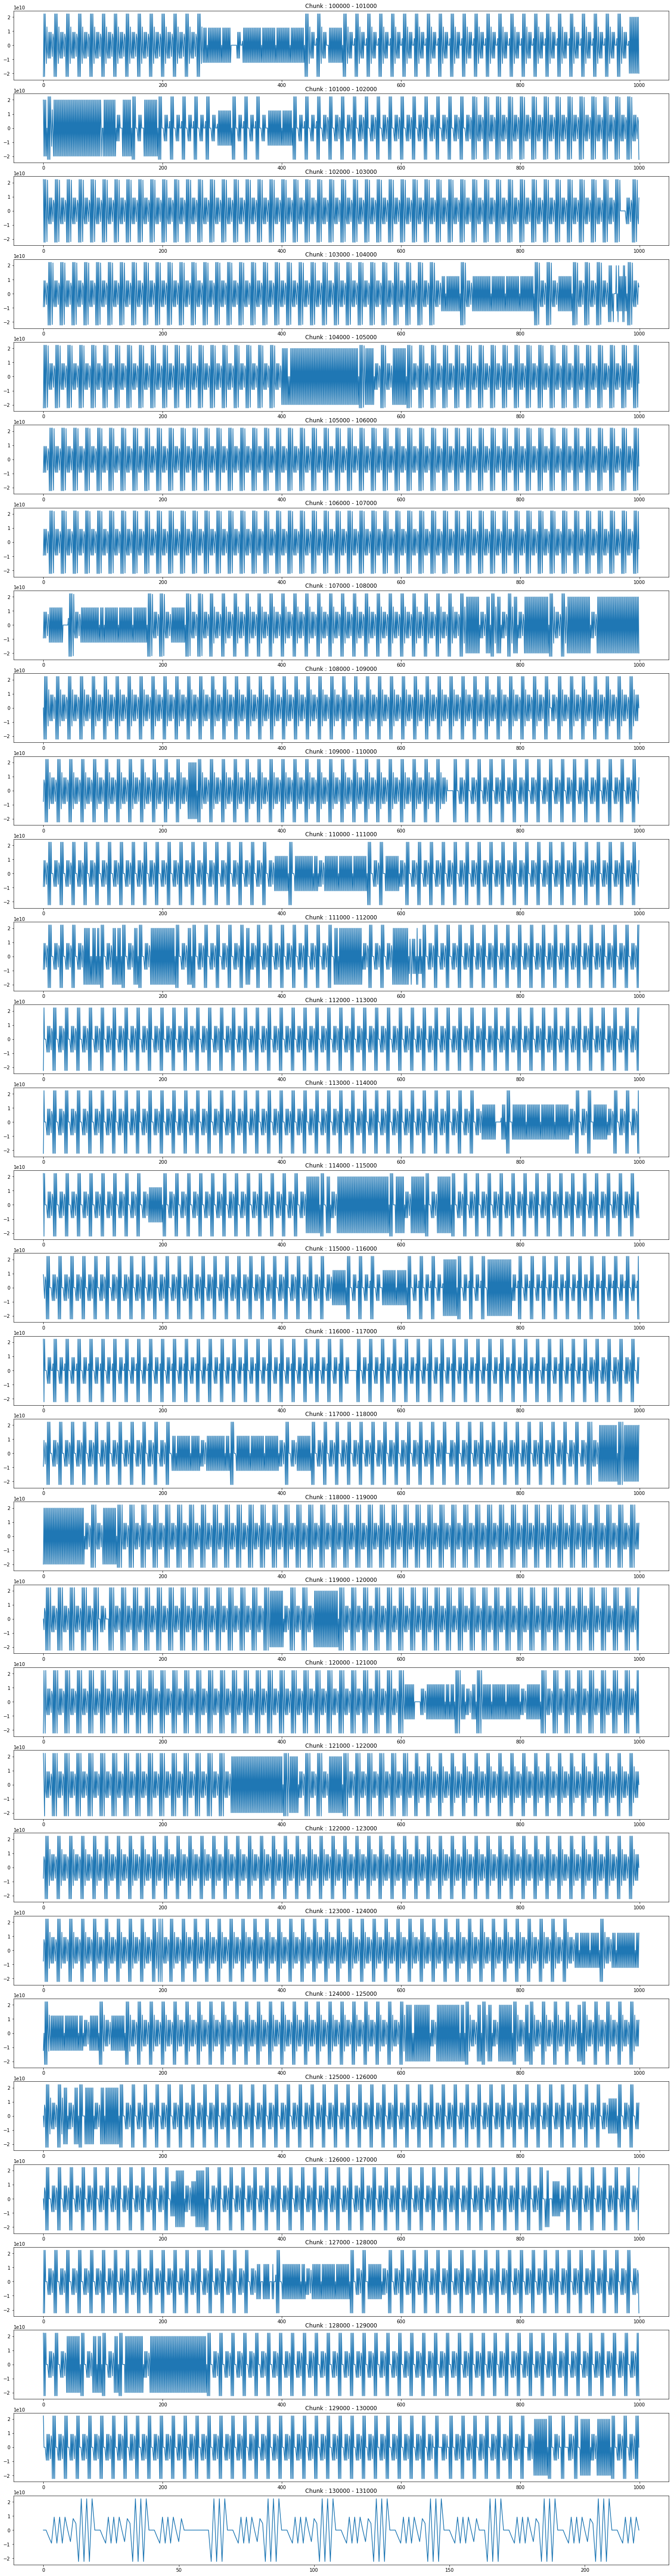

In [23]:
plt.figure(figsize=(25, 100))
num_chunk = 31
for i in range(num_chunk):
        ax = plt.subplot(num_chunk, 1, i+1)
        title = plt.title("Chunk : {} - {}".format(100000 + i*1000, 100000 + (i+1)*1000))
        plot = plt.plot(tokenized_data[100000 + i*1000:100000 + (i+1)*1000])

In [24]:
terminal_stage_index = None

In [30]:
processed_dataset = pd.DataFrame(data=np.c_[data[initial_stage_index:terminal_stage_index], data[initial_stage_index+1:terminal_stage_index+1], delta[initial_stage_index:terminal_stage_index], tokenized_data[initial_stage_index:terminal_stage_index]], columns=["t", "t+1", "delta", "tokenized_data"])
processed_dataset

t           t+1  delta  tokenized_data
0      104291368960  104291373056   4096            4096
1      104291373056  104291377152   4096            4096
2      104291377152  104291381248   4096            4096
3      104291381248  104291385344   4096            4096
4      104291385344  104291389440   4096            4096
...             ...           ...    ...             ...
44873  103535153152  103535157248   4096            4096
44874  103535157248  103535161344   4096            4096
44875  103535161344  103535165440   4096            4096
44876  103535165440  103535169536   4096            4096
44877  103535169536  103535173632   4096            4096

[44878 rows x 4 columns]

In [31]:
for i in range(18000, 19000):
    print(processed_dataset["t+1"][i] - processed_dataset["t"][i], processed_dataset["delta"][i])

4096 4096
4096 4096
4096 4096
4096 4096
4096 4096
4096 4096
4096 4096
4096 4096
4096 4096
4096 4096
4096 4096
4096 4096
4096 4096
4096 4096
4096 4096
4096 4096
4096 4096
4096 4096
4096 4096
4096 4096
4096 4096
4096 4096
4096 4096
4096 4096
4096 4096
4096 4096
4096 4096
4096 4096
4096 4096
4096 4096
4096 4096
4096 4096
4096 4096
4096 4096
4096 4096
4096 4096
4096 4096
4096 4096
4096 4096
4096 4096
4096 4096
4096 4096
4096 4096
4096 4096
4096 4096
4096 4096
4096 4096
4096 4096
4096 4096
4096 4096
4096 4096
4096 4096
4096 4096
4096 4096
4096 4096
4096 4096
4096 4096
4096 4096
4096 4096
4096 4096
4096 4096
4096 4096
4096 4096
4096 4096
4096 4096
4096 4096
4096 4096
4096 4096
4096 4096
4096 4096
4096 4096
4096 4096
4096 4096
4096 4096
4096 4096
4096 4096
4096 4096
4096 4096
4096 4096
4096 4096
4096 4096
4096 4096
4096 4096
4096 4096
4096 4096
4096 4096
4096 4096
4096 4096
4096 4096
4096 4096
4096 4096
4096 4096
4096 4096
4096 4096
4096 4096
4096 4096
4096 4096
4096 4096
4096 4096
4096 4096


In [32]:
processed_dataset["tokenized_data"].value_counts()

 4096       44205
 0            354
-6291456      139
 2097152      137
-1             43
Name: tokenized_data, dtype: int64

In [33]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(processed_dataset, test_size=0.25, shuffle=False)
train_set, test_set

(                  t           t+1    delta  tokenized_data
 0      104291368960  104291373056     4096            4096
 1      104291373056  104291377152     4096            4096
 2      104291377152  104291381248     4096            4096
 3      104291381248  104291385344     4096            4096
 4      104291385344  104291389440     4096            4096
 ...             ...           ...      ...             ...
 33653  103658029056  103658029056        0               0
 33654  103658029056  103660126208  2097152         2097152
 33655  103660126208  103660126208        0               0
 33656  103660126208  103653834752 -6291456        -6291456
 33657  103653834752  103653834752        0               0
 
 [33658 rows x 4 columns],
                   t           t+1    delta  tokenized_data
 33658  103653834752  103655931904  2097152         2097152
 33659  103655931904  103655931904        0               0
 33660  103655931904  103649640448 -6291456        -6291456
 33661  103

train_set.to_csv("data/StreamBench_1G1P_train_set.csv", index=False)
test_set.to_csv("data/StreamBench_1G1P_test_set.csv", index=False)